## Logistic Regression

We would be solving classification problems using logistic regression. In the first exercise, we would be learning an algorithm to classify students admission decision based on their test scores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Loading the data into a numpy ndarray object

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter = ',')
X = data[:,:2]
y = data[:,2]
y = y.reshape(len(y), 1)

To get a feel of the data set, we plot of scatter diagram which would give us an idea if the decision boundary is linear or non-linear.

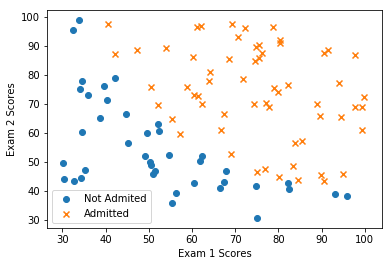

In [3]:
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], marker = 'o', label = 'Not Admited') #Not admitted
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], marker = 'x', label = 'Admitted') #Admitted
plt.xlabel('Exam 1 Scores')
plt.ylabel('Exam 2 Scores')
plt.legend()
plt.show()

It seems as linear decision boundary is quite possible from a plot displayed above. 
We would apply a linear function to the sigmoid logistic function to enable us learn the parameters for the decision boundary.

### The Sigmoid function

The sigmoid logistic function which is uniquely S shaped gives us a tool for classifying our data between classes, say positive and negative based on the output from the a decision boundary function which could be linear as in most cases or non-linear. The general implementation of the logistic function approaches 1 for very positive values of x and 0 for very negative values of x cutting the x-axis at y = 0.5.

In [4]:
def sigmoid(x):
    '''
    input: a value or an array of values.
    Returns: The output of the sigmoid function operated on the input value.
    '''
    
    return 1/(1 + np.exp(-x))

To perform a test plot of the sigmoid function using random generated data.

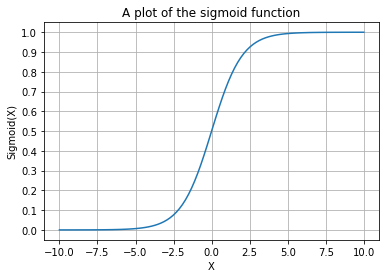

In [7]:
a = np.linspace(-10, 10, 100) #Generate an arbitrary list of 100 values from -20 to 20
b = sigmoid(a)
plt.plot(a, b)
plt.xlabel("X")
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.grid()
plt.ylabel("Sigmoid(X)")
plt.title("A plot of the sigmoid function")
plt.show()

Implementing the logistic regression cost function

In [8]:
def cost(theta, X, y):
    '''
    Inputs: 
    theta - The parameter vector for the decision boundary.
    X - The feature matrix for the features.
    y - The labels corresponding to the features.
    
    Returns: The cost
    '''
    theta = theta.reshape((theta.shape[0],1))
    m = len(y)
    h = sigmoid(np.matmul(X, theta))
    cost = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def grad(theta, X, y):
    '''
    theta - The parameter vector for the decision boundary.
    X - The feature matrix for the features.
    y - The labels corresponding to the features.
    
    Returns: The gradient or differential values corresponding to the theta parameters.
    '''
    theta = theta.reshape((theta.shape[0],1))
    m = len(y)
    h = sigmoid(np.matmul(X, theta))
    grad = (1/m) * sum(((h - y) * X))
    
    return grad#.reshape(theta.shape)
    

### Optimization

We would apply an optimization algorithm implemented in the Scipy library to minimize the cost function, thus obtaining the optimal value of the decision boundary parameter vector theta.

We used the Truncated Newton algorithm, TNC from the optimize class in the Scipy library to minimize the cost function and thus obtain the optimal learning paramers. It is also possible to use other minimization methods, although this works well for our problem.

In [182]:
X = np.ones((X.shape[0],3))
X[:,1:3] = data[:,:2]
theta = np.zeros(X.shape[1])
thetaOpt = optimize.minimize(fun = cost, x0 = theta, jac = grad, args = (X,y), method = 'TNC')
thetaOpt = thetaOpt.x

Now that we have obtained a trained logistic regression model by learning the model parameters, we now plot the decision boundary. The decision boundary is linear based on the 2 features.
    theta0 + theta1.X1 + theta2X2 = 0 is the equation for this straight line.

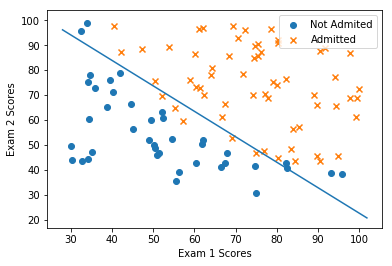

In [188]:
plotX = np.array([min(X[:,1] - 2), max(X[:,1]) + 2])
plotY = (thetaOpt[1] * plotX + thetaOpt[0])/ -thetaOpt[2]
plt.plot(plotX, plotY)
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], marker = 'o', label = 'Not Admited') #Not admitted
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], marker = 'x', label = 'Admitted') #Admitted
plt.xlabel('Exam 1 Scores')
plt.ylabel('Exam 2 Scores')
plt.legend()
plt.show()

Finally, we would determine the accuracy on our training set.

In [108]:
def predict (X, y, theta):
    t = sigmoid(np.matmul(X,theta))
    ypred = np.array([1 if i >= 0.5 else 0 for i in t]) #gives the predicted values
    y = y.flatten()
    acc = (ypred == y)
    acc = acc.astype(int)
    predictAccuracy = np.mean(acc)
    return predictAccuracy * 100

In [227]:
predict(X, y, thetaOpt)

89.0

The prediction accuracy of using the training data is 89.0%. Although this is not a good measure of the model since it is based on the same data with which it was developed.

### Non-Linear Logistic regression (With regularization)

We would now use logistic regression for the classification of a case that cannot be seperated using a linear decision boundary. We would attempt to predict if microchips from a fabrication process passes QA tests based on the test result from two test cases in the dataset.

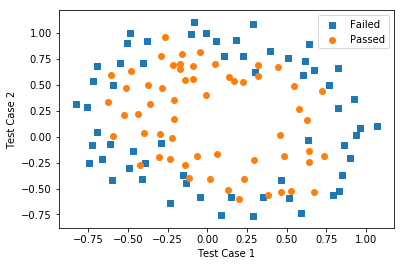

In [106]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:,:2]
y = data[:,2]
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], marker= 's', label='Failed')
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], marker= 'o', label='Passed')
plt.xlabel('Test Case 1')
plt.ylabel('Test Case 2')
plt.legend()
plt.show()

Clearly, the data cannot be seperated with a linear decision boundary. Perhaps something similar to an elipse might do a good job of seperating the failed and passed microchip samples, lets find out.

We would create extra features which would add extra complexity to the model in order to fit the training data properly. Lets create polynomials to the sixth power using the two training features we already have.    

In [107]:
a = []
for i in range(1,7):
    for j in range(i+1):
        new = np.power(X[:,0],(i-j)) * np.power(X[:,1], j)
        X =  np.hstack((X, new.reshape(len(y), 1)))
        #a.append([(i-j),j])
X = np.hstack((np.zeros((len(y),1)), X))

In [52]:
X.shape

(118, 30)

In [65]:
theta = np.zeros(X.shape[1])
y = y.reshape(len(y), 1)
thetaOpt = optimize.minimize(fun = cost, x0 = theta, jac = grad, args = (X,y), method = 'L-BFGS-B')
thetaOpt = thetaOpt.x

The vector thetaOpt represents the parameters for the model which we have learnt via or 6th power logistic regression model. We now attempt to plot the decision boundary for a set of points within the axis of our initial scatter plot.

In [ ]:
#This is similar to process which was used in creating the extra features above.
def mapfeature(X1, X2, n):
    '''
    Returns: An array obtained using the input creating extra features to power n
    '''
    X = [1,X1, X2]
    for i in range(1,n+1):
        for j in range(i+1):
            X.append(X1**(i-j) * X2**(j))
    
    return np.array(X)

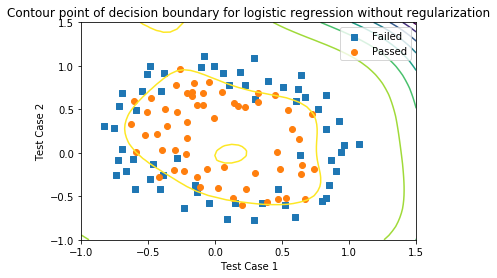

In [111]:
u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
z = np.zeros([len(u),len(v)])
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]= np.matmul(mapfeature(u[i],v[j],6),thetaOpt)

z = z.T
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], marker= 's', label='Failed')
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], marker= 'o', label='Passed')
plt.contour(u,v,z)
plt.title('Contour point of decision boundary for logistic regression without regularization')
plt.xlabel('Test Case 1')
plt.ylabel('Test Case 2')
plt.legend()
plt.show()


Notice that the decision boundary fits the data very accurately, however there is a tendency that this model would not generalize on new data. It seems that the model memorized the training set; this is problem of over-fitting and to overcome this we would apply regularization to simplify the model to reduce its variance.

In [80]:
def cost_reg(theta, X, y, lambd):
    '''
    Inputs: 
    theta - The parameter vector for the decision boundary.
    X - The feature matrix for the features.
    y - The labels corresponding to the features.
    lambd - Regularization coefficient
    
    Returns: The cost
    '''
    theta = theta.reshape((theta.shape[0],1))
    m = len(y)
    h = sigmoid(np.matmul(X, theta))
    cost = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    cost += (lambd/(2*m)) * np.power(theta,2) #this takes into account the regularization term, thus increasing the cost or penalty for the selected parameters
    return cost

def grad_reg(theta, X, y, lambd):
    '''
    theta - The parameter vector for the decision boundary.
    X - The feature matrix for the features.
    y - The labels corresponding to the features.
    lambd - Regularization coefficient
    
    Returns: The gradient or differential values corresponding to the theta parameters.
    '''
    theta = theta.reshape((theta.shape[0],1))
    m = len(y)
    h = sigmoid(np.matmul(X, theta))
    grad = (1/m) * sum(((h - y) * X))
    theta[0,0] = 0
    theta = theta.flatten()
    grad += (lambd/m) * theta # To account for regularization. The constant term is usually not regularized.
    
    return grad
    

In [112]:
theta = np.zeros(X.shape[1])
lambd = 0.001
y = y.reshape(len(y), 1)
thetaOpt = optimize.minimize(fun = cost_reg, x0 = theta, jac = grad_reg, args = (X,y, lambd), method = 'L-BFGS-B')
thetaOpt = thetaOpt.x

Notice that the new decision boundary, using a small amount of regularization (lambda of 0.001) tends create a less complex model and would most likely reduce the amount of overfitting.

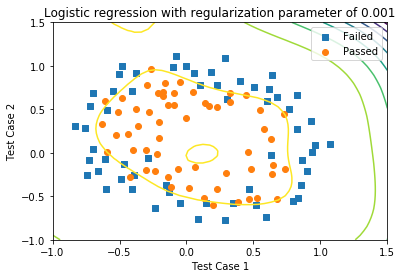

In [113]:
u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
z = np.zeros([len(u),len(v)])
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]= np.matmul(mapfeature(u[i],v[j],6),thetaOpt)

z = z.T
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], marker= 's', label='Failed')
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], marker= 'o', label='Passed')
plt.contour(u,v,z, label = 'Decision Boundary')
plt.xlabel('Test Case 1')
plt.ylabel('Test Case 2')
plt.title('Logistic regression with regularization parameter of 0.001')
plt.legend()
plt.show()

If the value of lambda is zero then the model is without regularization, having a high variance as with the first plot. However, if the amount of regularization becomes too high, the model becomes too simple and the model would underfit the training set, thus having a high bias as we would see below. 

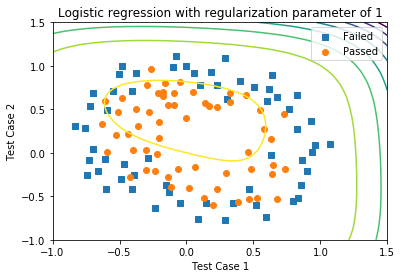

In [114]:
theta = np.zeros(X.shape[1])
lambd = 1
y = y.reshape(len(y), 1)
thetaOpt = optimize.minimize(fun = cost_reg, x0 = theta, jac = grad_reg, args = (X,y, lambd), method = 'L-BFGS-B')
thetaOpt = thetaOpt.x

u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
z = np.zeros([len(u),len(v)])
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]= np.matmul(mapfeature(u[i],v[j],6),thetaOpt)

z = z.T
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], marker= 's', label='Failed')
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], marker= 'o', label='Passed')
plt.contour(u,v,z, label = 'Decision Boundary')
plt.xlabel('Test Case 1')
plt.ylabel('Test Case 2')
plt.title('Logistic regression with regularization parameter of 1')
plt.legend()
plt.show()

The prediction accuracy of model using our training set is:

In [110]:
predict(X, y, thetaOpt)

86.440677966101703

86.44% is not too bad for a start!!!